<a href="https://colab.research.google.com/github/jimohafeezco/computer_vision/blob/master/HoughTransform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Computer Vision (Spring 2020)

Instructor: Muhammad Fahim

TA: Marcus

**Acknowledgement**<br>
This lab was maintained by Marcus, Rufina, Alex and Fahim
<br><br>

This lab was created by: Alex<br>
Email: a.grashchenkov@innopolis.ru<br>
Links: [github](https://github.com/AlexandrGraschenkov)

## Lab Objectives
Line Hough Transform

#### Prepare

In [ ]:
!wget "https://drive.google.com/uc?export=view&id=1H64BwqU30_MTsT_7sWZ66ijFt1vL4b8a" -O paper_test.jpg

--2020-04-06 09:14:57--  https://drive.google.com/uc?export=view&id=1H64BwqU30_MTsT_7sWZ66ijFt1vL4b8a
Resolving drive.google.com (drive.google.com)... 74.125.31.102, 74.125.31.139, 74.125.31.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.31.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-7s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hqt5v1v33838keph8cv5eaj68mn16ua7/1586164425000/17396682441590382856/*/1H64BwqU30_MTsT_7sWZ66ijFt1vL4b8a?e=view [following]
--2020-04-06 09:14:57--  https://doc-00-7s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hqt5v1v33838keph8cv5eaj68mn16ua7/1586164425000/17396682441590382856/*/1H64BwqU30_MTsT_7sWZ66ijFt1vL4b8a?e=view
Resolving doc-00-7s-docs.googleusercontent.com (doc-00-7s-docs.googleusercontent.com)... 172.253.123.132, 2607:f8b0:400c:c16::84
Connecting to doc-00-7s-docs.googleusercontent.com (doc-00-7s-docs.google

In [ ]:
# all plots will be displayed directly below the code cell that produced it
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
# set inline plots size
plt.rcParams["figure.figsize"] = (16, 10) # (w, h)
# remove grid lines
import numpy as np
import time, cv2, math
from typing import AnyStr, Any, Callable

In [ ]:
# function to read and resize an image
def read_and_resize(filename: str, grayscale: bool = False, fx: float = 1.0, fy: float = 1.0):
    if grayscale:
      img_result = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
      imgbgr = cv2.imread(filename, cv2.IMREAD_COLOR)
      # convert to rgb
      img_result = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
    # resize
    if fx != 1.0 and fy != 1.0:
      img_result = cv2.resize(img_result, None, fx=fx, fy=fy, interpolation = cv2.INTER_CUBIC)
    return img_result

    
def show_in_row(list_of_images: list, titles: list = None, disable_ticks: bool = False):
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()

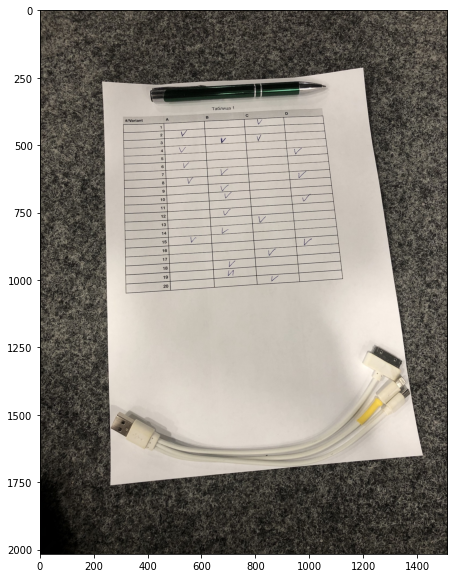

In [ ]:
img = read_and_resize("paper_test.jpg")
show_in_row([img])

### Find paper

You are good


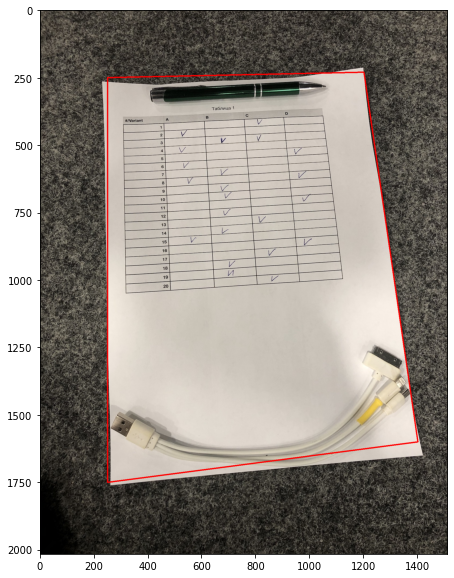

In [ ]:
#TODO
# Find paper corners

def find_paper_corners(color_img: np.array) -> np.array:
  # return np.array with shape (4, 2)
  # order: [top_left, top_right, bot_right, bot_left]    

  return np.array([[250, 250], [1200, 230], [1400, 1600], [250, 1750]])

corners = find_paper_corners(img)
if corners.shape == (4, 2):
  print("You are good")
  img_copy = img.copy()
  cv2.polylines(img_copy, [corners], True, (255,0,0), 3)
  show_in_row([img_copy])
else:
  print("Shape must contain the answer to the ultimate question of life")


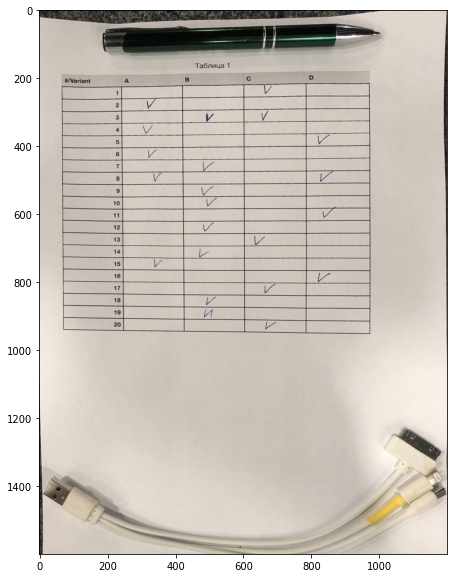

In [ ]:
# TODO

def undistort_perspective(img: np.array, corners: np.array) -> np.array:
  pts_dst = np.array([[0, 0], [1200, 0], [1200, 1600], [0, 1600]])
  homography,status = cv2.findHomography(corners,pts_dst)
  im = cv2.warpPerspective(img,homography,(1200,1600))
  return im

paper = undistort_perspective(img, corners)
show_in_row([paper])

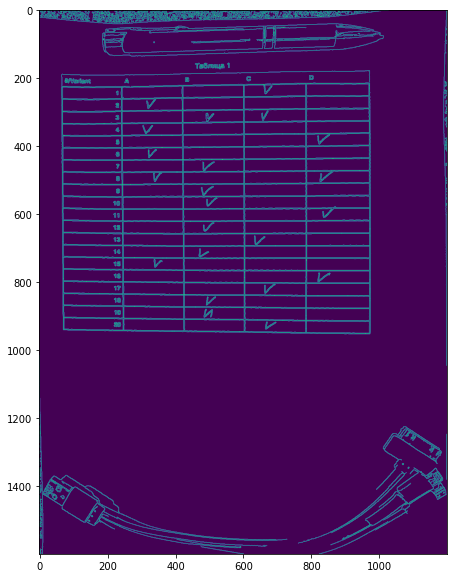

In [ ]:
#image is paper
dst = cv2.Canny(paper, 50, 200, None, 3)

plt.imshow(dst)

In [ ]:
lines = cv2.HoughLines(dst, 1, np.pi / 180, 300, None, 0, 0)
interest_lines=[]
for line in lines:
    if line[0][0] > 150:
        interest_lines.append(line)
lines = interest_lines

In [ ]:
dst_draw = cv2.cvtColor(dst,cv2.COLOR_GRAY2RGB)

if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]

            #vertical lines
            # if theta==0:

            #     x = rho * math.cos(theta)
            #     y = rho * math.sin(theta)

            #     a = math.cos(theta)
            #     b = math.sin(theta)
            #     x0 = a * rho
            #     y0 = b * rho
            #     pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            #     pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))

            #horizontal lines approximately pi/2
            if theta !=0:
                x = rho * math.cos(theta)
                y = rho * math.sin(theta)

                a = math.cos(theta)
                b = math.sin(theta)
                x0 = a * rho
                y0 = b * rho
                pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
                pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
                
                cv2.line(dst_draw, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

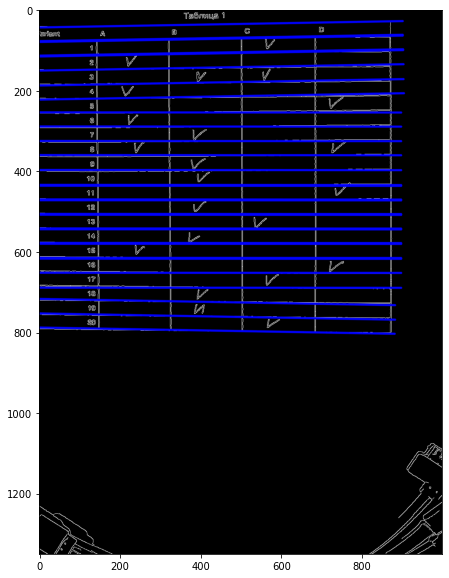

In [ ]:

interest_area =  dst_draw[150:-100,100:-100]
plt.imshow(interest_area)

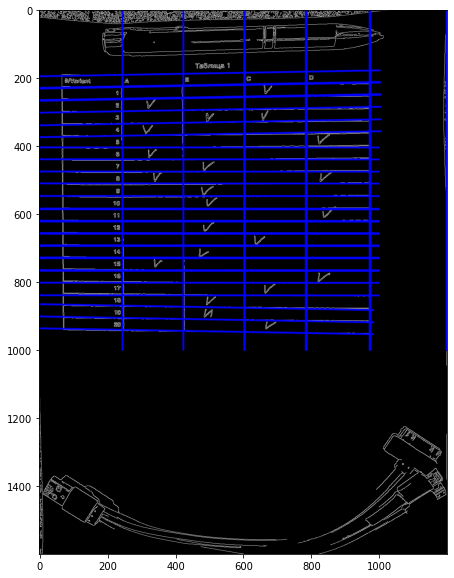

In [ ]:
# interest_area =  dst_draw[150:-100,100:-100]
plt.imshow(dst_draw)

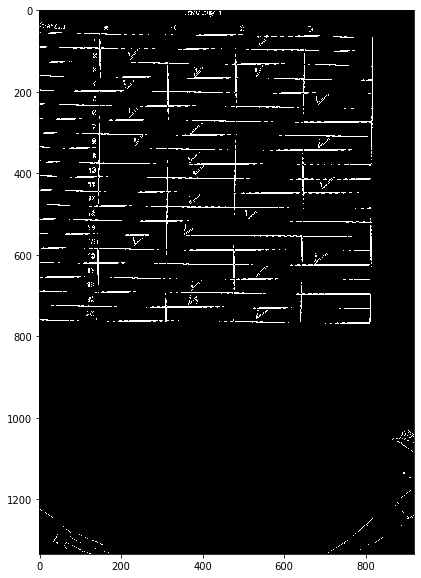

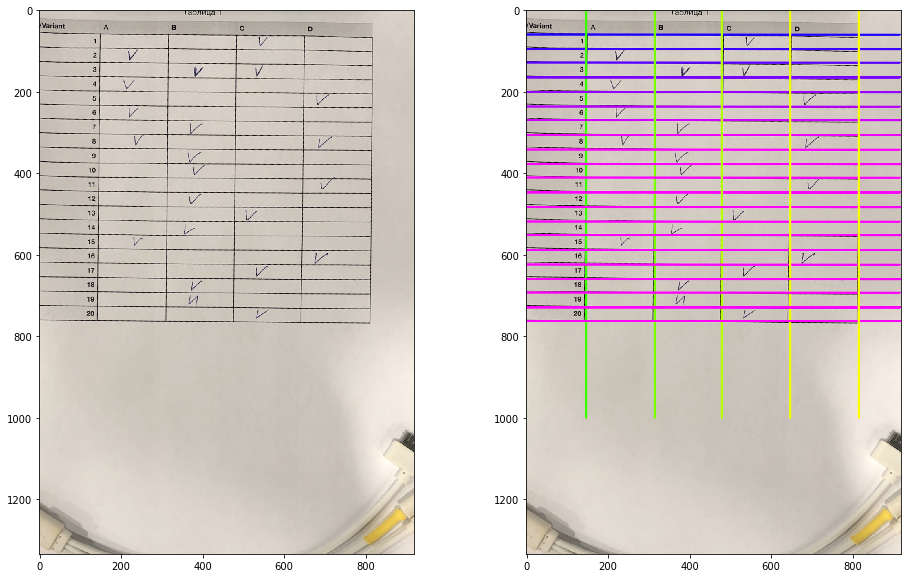

[]
TODO


In [ ]:
# TODO

def find_answers(color_img: np.array) -> list:
  # return in format [[A], [B, C], [], [A], ..]
  w
  return []

answers = find_answers(paper[150:-100,100:-100])
print(answers)
if len(answers) == 20 and answers[0][0] == ['C']:
  print("Seems like you did well!")
else:
  print("TODO")